# k-Nearest Neighbors (kNN)

##   Introduction

Imagine we're a doctor. We're often faced with the task of identifying whether a tumour is cancerous (malignant) or not cancerous (benign). Normally, we'd have to inspect medical images and rely on years of medical training to make this call. But what if a computer could help do this job?

In our previous discussions, we discussed using a logistic regression method to do just this. But sometimes, real-life data isn't so straightforward. Take tumors for instance. Their characteristics can vary a lot. Some are small, some are big. Some are round, others are irregular in shape. When the straight "line of best fit" isn't the best fit for our data, we use different methods. One such method is the k-Nearest Neighbors (kNN) algorithm.

In simplest term, let's just say that kNN is asking "k" neighbours around the prediction data and then make a decision based on the majority of those "k" closest data.

Let's explore the kNN method in greater depth. We'll learn how to decide how many neighbours ($k$) to consider and how to use kNN to sort out tumours into malignant or benign.

## What is k-Nearest Neighbors (kNN)?

The k-Nearest Neighbors (kNN) is a type of machine learning algorithm. It's like the helpful neighbour we call on when we need advice, but with a twist.

In machine learning, we often want our computer (also referred to as a model) to learn from past data to make future decisions or predictions. The kNN algorithm is one such tool that helps in this learning.

The concept of kNN is quite simple and is used for both classification and regression tasks.

- **Classification**

  Classification is like sorting objects into buckets. For example, deciding if an email is 'spam' or 'not spam', or classifying a tumor as 'malignant' or 'benign' are classification problems. Here, the kNN algorithm sorts a new object (like an email or a tumour) into a category based on how similar it is to objects it already knows about.

- **Regression**

  Regression, on the other hand, is like predicting a number. For example, predicting a house's price based on features like the number of bedrooms, location, and size. Here, the kNN algorithm predicts a new number based on the existing numbers it has seen that are most similar to the new entry.

The "k" in kNN stands for the number of neighbours the algorithm checks with before making its decision or prediction. If we have "5" as our k value, the algorithm looks at the 5 closest neighbours (i.e., the 5 most similar data points) it already knows about to make its prediction. Finally, "Nearest" signifies that we consider only the closest or most similar data points to make this prediction.

## How Does kNN Work?

![Visualization](https://storage.googleapis.com/rg-ai-bootcamp/machine-learning/knn-visual-min.png)

Source: [Youtube](https://youtu.be/Mhv-HxGSgHU?si=V7QlAsw_JM6sBgUa)

Let's dive deeper into the k-Nearest Neighbors (kNN) method. Imagine that we are a doctor who examines the scan results of a tumour and decides whether the tumour is dangerous (malignant) or not (benign). We can think of kNN as a way to make decisions based on community wisdom.

In this case, the so-called 'crowd' consists of tumours that have been previously examined. These past examples have known classifications—they can be malignant or benign. This is our training data.

| Tumour size | Age | Status |
|:-----------:|:---:|:------:|
| 3.6         | 50  | 0      |
| 6.6         | 31  | 1      |
| 3.3         | 32  | 0      |
| 8.1         | 21  | 1      |
| 3.1         | 33  | 0      |
| 5.6         | 30  | 1      |
| 1.0         | 26  | 0      |
| ...         | ..  | .      |
| 1.2         | 44  | 0      |

But how is our new tumour related to this 'crowd' of tumours?

### Distance

This is where the concept of 'distance' comes into play. We consider each feature of our tumour – such as tumour size and patient age – as a dimension. These dimensions form a space, and each tumour occupies a point in that space.

The 'distance' between two tumours in this multidimensional space shows how similar they are. Two tumours that are small distances apart are very similar, whereas two tumours that are large distances are very different.

![distance](https://storage.googleapis.com/rg-ai-bootcamp/machine-learning/distance-min.png)

### Measuring distance

How do we calculate this distance? There are many ways to calculate distance, one of which is by using Euclidean distance. Euclidean plays a role in measuring the distance between two points. The only difference here is that we can do it in more than two dimensions!

![euclidean](https://storage.googleapis.com/rg-ai-bootcamp/machine-learning/euclidean-min.png)

(Source: [medium.com/@luigi.fiori.lf0303](https://medium.com/@luigi.fiori.lf0303/distance-metrics-and-k-nearest-neighbor-knn-1b840969c0f4))

For example, the Euclidean distance between tumours A and B uses the formula:
$$d(x,y) = \sqrt{\sum_{i=1}^{m}(x_i - y_i)^2}$$

In each dimension, we calculate the difference between the two points' values, which gives us the length of that dimension's "side" of the hypothetical triangle. We then square this length and add it to our ongoing sum. Taking the square root of this cumulative sum yields our Euclidean distance.

Besides Euclidean, there are also other ways to measure distance, such as **Manhattan Distance** or **Minkowski Distance**, but Euclidean is the most common.

### Neighbours

Now that we have a way to calculate distance, how do we use it to classify our new tumour?

Remember the 'k' in kNN. This is where this comes into play.

If k=3, the system will check the 3 tumours 'closest' to the new tumour.

If k=6, the system will check the 6 tumours 'closest' to the new tumour.

- If more of the 'nearest neighbours' are benign, the system will classify the new tumour as benign.
- If more of the 'nearest neighbours' are malignant, it classifies the new tumour as malignant.

![k-illustration](https://storage.googleapis.com/rg-ai-bootcamp/machine-learning/k-ilustration-min.png)

In other words, our new tumor is classified based on the majority vote of its nearest neighbours.

## Selecting the Right '$k$'

Just as we need the right number of people to make a group decision, we also need the right number of neighbors ($k$) in kNN to make a good classification. But how do we choose the right '$k$'?

### Importance of '$k$' in kNN

Suppose we go back to analyzing a tumor and ask the opinion of three nearby tumors. If two people say it is benign and one says it is malignant, we will choose the majority and classify it as benign.

Now, what if we asked five tumors for their opinions and three said they were benign while two said they were malignant? We still classify this new tumor as benign.

Herein lies the problem: what if the three closest tumors are said to be benign, but when we take the five closest tumors, three tumors are said to be malignant?

The number of neighbors we ask ($k$) can change our final decision. Therefore, 'k' in kNN is the hyperparameter that we have to choose at the beginning. Hyperparameters are settings in a machine learning algorithm that we must set before the learning process begins.

### Selects the optimal '$k$'

If we only ask one neighbor ($k=1$), we are essentially letting one tumor decide. This can lead to overfitting. These models may work well on existing tumor data, but may fail on new tumors. Why? Because he is very sensitive to tumors that he already knows about.

On the other hand, if we ask for all our tumors (let's say we have a thousand), we will only select the class with the most tumors. This can lead to underfitting, because we don't actually learn any patterns or consider their similarities.

So, in the middle is the 'exact' value of '$k$'. But how do we find it? There are several ways to determine the 'correct' value of $k$, including:
1. Try different $k$ values and see which produces the most accurate predictions on a portion of our data set aside for validation (called the validation set). This is a common practice.
2. We can start from `Sqrt(n)`, where `n` is the total number of data points. Odd 'k' values are chosen to avoid confusion in case of a tie (same number of neighbors from both classes). We should have a small enough 'k' to start the initial predictions before figuring the optimal.

We can also use kNN for clustering:

![Clustering](https://storage.googleapis.com/rg-ai-bootcamp/machine-learning/knn-clustering-min.png)

## Advantages and Disadvantages of kNN

Every tool has its strengths and weaknesses, and k-Nearest Neighbors (kNN) is no exception. Let's understand where kNN shines and where caution needs to be applied.

### Advantages of kNN

**1. Simplicity:** One of the main advantages of kNN is its simplicity. It's easy to understand and implement. The concept of "choosing based on the opinion of neighbours" is straightforward.

**2. Effectiveness with Large Datasets:** When it comes to big datasets with lots of examples to learn from, kNN is quite effective. Just as a doctor gets better at diagnosing with more patients, kNN improves with more data.

### Disadvantages of kNN

**1. Sensitivity to Irrelevant Features:** Imagine we have tumour data with an irrelevant feature, like the patient's favourite colour. kNN does not differentiate important features from less important ones, which can cause misclassifications. We must be careful in selecting relevant features for the model.

**2. The Curse of Dimensionality:** Remember how we discussed data being plotted in a space with dimensions? Well, as the number of dimensions (features) increases, the data becomes sparse and distant from each other, making it more challenging for kNN to find meaningful neighbours. This problem is known as the "curse of dimensionality."

## Hands-On Example: Using kNN in Machine Learning

### Import libraries

Before any machine learning wizardry can happen, we need to set our stage first! This involves importing all the necessary Python libraries and functions we'll need for our journey. So, Let's call upon pandas, numpy, scikit-learn and some of its modules.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

### Load dataset

Once we've set the stage, our next step is to load the patient data that we will analyze. We'll use the Python library pandas, which provides excellent data reading capabilities.

In [ ]:
dataset = pd.read_csv('https://storage.googleapis.com/rg-ai-bootcamp/machine-learning/patients-data.csv')
print(len(dataset))
dataset.head(10)

299


,tumour_size,age,status
0,3.6,50,0
1,6.6,31,1
2,3.3,32,0
3,8.1,21,1
4,3.1,33,0
5,5.6,30,1
6,1.0,26,0
7,5.3,29,1
8,7.6,30,1
9,8.0,34,1


### Split dataset

Let's now take a third step. We will divide our dataset into two parts - the training set and the testing set. This will allow us to train our model and evaluate its performance on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, 0:2]
y = dataset.iloc[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (239, 2) (239,)
Test set: (60, 2) (60,)


### Train Model and Predict

After that, we define the model using `KNeighborsClassifier` and fit the train data in the model. Just like Logistic Regression, `sklearn` provides the `KNeighborsClassifier` class in the `sklearn.model_selection` module. Here's how you can do it:

In [ ]:
k = 11
classifier = KNeighborsClassifier(n_neighbors = k, metric='euclidean').fit(X_train,y_train)
classifier

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

### Predict the test set results

After training the model, the next step is to utilize our trained classifier to predict results on the test set. Let's delve directly into making these predictions and observe the results our model produces.

In [ ]:
X_test.head()

,tumour_size,age
206,4.0,22
188,2.8,24
12,5.8,31
219,8.2,29
237,5.1,21


In [ ]:
y_hat = classifier.predict(X_test)
y_hat

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

Upon executing our classifier's prediction on the test set, we can see the predicted tumour categories.
- 0 represents 'benign'
- 1 stands for 'malignant'.

This array of 0s and 1s is our model's attempt at diagnosing each analyzed tumour based on the patterns it discovered during the training phase. We will proceed next to evaluate the accuracy of these predictions. It's important to evaluate the model.

### Evaluate Model

Moving on to the next crucial phase, let's use confusion matrix to do that. The confusion matrix will provide us valuable insights into the accuracy of our model's predictions. It allows us to understand the model's performance by showcasing the correctly and incorrectly predicted values. Let's delve into creating our confusion matrix now.

In [ ]:
cm = confusion_matrix(y_test, y_hat)
print (cm)

[[29  0]
 [ 3 28]]


 A confusion matrix is a table used in statistics to evaluate the accuracy of a classification model. It displays the number of correctly and incorrectly predicted observations. Here's how to interpret the matrix:

```
[[29  0]
 [ 3 28]]
```

- The top left value `29` represents the `True Positives (TP)`: These are cases in which we predicted malignant, and it is indeed malignant.

- The top right value `0` represents the `False Positives (FP)`: These are cases in which we predicted malignant, but the tumor is not actually malignant. There are none such cases in your result.

- The bottom left value `3` represents the `False Negatives (FN)`: These are cases in which we predicted benign, but the tumor is malignant. We have 3 such cases here.

- The bottom right value `28` represents the `True Negatives (TN)`: These are cases in which we predicted benign, and the the tumor is indeed benign.

In summary, our model performed quite well! Out of the 60 test instances, it correctly predicted 57 (29 + 28 = 57) of them, and misclassified 3. The model successfully identified all negative cases, and only misclassified 3 positive cases.

After evaluating our model, it is now important to assess how well our model performs. We will calculate the F1 score and accuracy, which is a key evaluation metric in machine learning. The F1 score indicates the balance between precision and recall, while accuracy represents a fraction from the correct predictions our model makes.

In [ ]:
print(f1_score(y_test, y_hat))
print(accuracy_score(y_test, y_hat))

0.9491525423728813
0.95


The F1 score is `0.9491525423728813` which is quite high. An F1 score is a measure of a model's precision and recall, and it ranges from 0 to 1. A high F1 score, as in this case, indicates that our model has high precision and recall. In other words, when our model predicts that a tumor is malignant, it is usually correct (high precision), and also correctly identifies the majority of malignant tumors (high recall).

The model accuracy is `0.95` or 95% indicating the proportion of the total model predictions that are made correctly. Specifically, it makes correct predictions in 95% of cases.

Overall, with an F1 score of `0.949` and an accuracy score of `0.95`, our model seems to perform very well in classifying the data in this case. A high value indicates that the model is reliable and likely to make correct predictions. Of course, this assumes that any new data follows a similar distribution to the training data.

### How to find the best $k$

Now we come to the most important stage in our analysis when applying the k-Nearest Neighbors (kNN) algorithm, namely determining the optimal number of 'neighbours' (k) for our model. A common solution is to back up some of your data to test the accuracy of the model. we will test different k values from 1 to 20. By calculating the model accuracy for each k, we can determine the most appropriate value of k —the one that allows the model to most accurately predict the class labels

We can calculate the accuracy of KNN for different values of $k$.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict
    classifier = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=classifier.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.93333333, 0.86666667, 0.9       , 0.9       , 0.9       ,
       0.9       , 0.91666667, 0.93333333, 0.96666667, 0.95      ,
       0.95      , 0.95      , 0.93333333, 0.91666667, 0.91666667,
       0.91666667, 0.9       , 0.9       , 0.9       ])

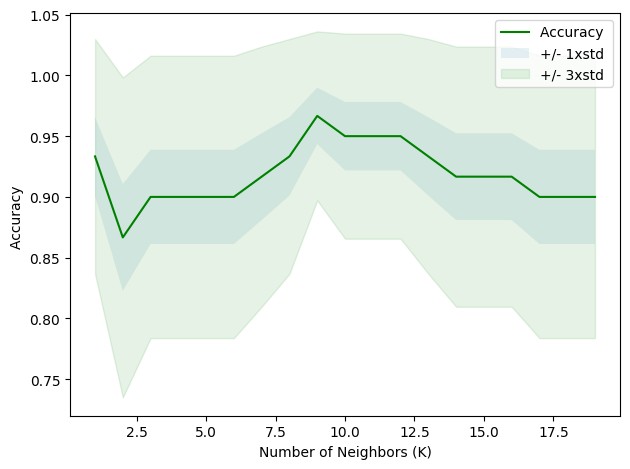

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9666666666666667 with k= 9


The numbers you see in the array represent the accuracy of the model (how close the output is to the expected outcome) for each "k". Accuracy is presented as a value between 0 (0%) and 1 (100%).

For example, when k=1, the model accuracy was about 93.3%, and when k=2, the accuracy dropped to around 86.7%. As we increased "k", we observed that the accuracy fluctuated. The highest accuracy achieved was about 96.7% (k=9).

From this experiment, it appears that choosing 9 as the number of nearest neighbors (k=9) would give us the highest accuracy for our model.